<a href="https://colab.research.google.com/github/Amarlalsingh/MNIST_digit_recognizer_project/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.layers import *
from keras.models import Model,Sequential,load_model
from keras.regularizers import *
from keras.activations import *
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt

In [33]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [34]:
train=pd.read_csv('/content/gdrive/My Drive/mnist/mnist_train.csv',header=None)
test=pd.read_csv('/content/gdrive/My Drive/mnist/mnist_test.csv',header=None)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

The MNIST dataset provided in a easy-to-use CSV format
This dataset uses the work of Joseph Redmon to provide the MNIST dataset in a CSV format.

The dataset consists of two files:

mnist_train.csv 

mnist_test.csv

The mnist_train.csv file contains the 60,000 training examples and labels. The mnist_test.csv contains 10,000 test examples and labels. Each row consists of 785 values: the first value is the label (a number from 0 to 9) and the remaining 784 values are the pixel values (a number from 0 to 255).


In [35]:
train.shape# 600001 rows 785 cols

(60001, 785)

In [36]:
train.head() #The head() function is used to get the first n rows.(here 5)
# This function returns the first n rows for the object based on position. 
#It is useful for quickly testing if your object has the right type of data in it

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
train.drop(train.index[0],inplace=True)

In [0]:
labels=train[0]
train.drop(columns=0,inplace=True)

In [39]:
type(train)

pandas.core.frame.DataFrame

In [40]:
train[:1]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
train[:]=array(train[:])

In [42]:
train[:1]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
train=train.values
train=train.reshape(train.shape[0],28,28)
train.shape

(60000, 28, 28)

In [44]:
print(train[1,:,:])

[['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
  '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
  '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
  '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
  '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '51' '159'
  '253' '159' '50' '0' '0' '0' '0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '48' '238'
  '252' '252' '252' '237' '0' '0' '0' '0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '54' '227' '253'
  '252' '239' '233' '252' '57' '6' '0' '0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '10' '60' '224' '252' '253'
  '252' '202' '84' '252' '253' '122' '0' '0' '0' '0' '0' '0']
 ['0' '0' '0

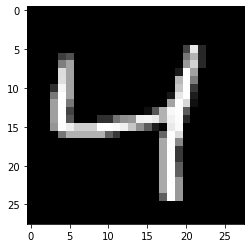

In [45]:
plt.imshow(np.float64(train[2,:,:]),cmap='gray')

In [0]:
train=train.reshape(train.shape[0],28,28)

In [47]:
train.shape

(60000, 28, 28)

In [48]:
type(train)

numpy.ndarray

In [49]:
type(test)

pandas.core.frame.DataFrame

In [0]:
test.drop(test.index[0],inplace=True)

In [0]:
Y_test=test[0]
test.drop(columns=0,inplace=True)

In [52]:
test.shape

(10000, 784)

In [0]:
test=test.values

In [0]:
test=test.reshape(test.shape[0],28,28)

In [55]:
test.shape

(10000, 28, 28)

In [56]:
train

array([[['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ...,
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0']],

       [['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ...,
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0']],

       [['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ...,
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0']],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..

In [57]:
test

array([[['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ...,
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0']],

       [['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ...,
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0']],

       [['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ...,
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0']],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..

In [0]:

train = np.asarray(train)
train = train.swapaxes(1, 2).reshape(len(train), 28, 28, 1)

In [0]:

test = np.asarray(test)
test = test.swapaxes(1, 2).reshape(len(test), 28, 28, 1)

In [0]:
labels=pd.get_dummies(labels)

In [61]:
test.shape

(10000, 28, 28, 1)

In [82]:

model=Sequential()
model.add(InputLayer((28,28,1)))
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1),padding='valid'))
model.add(Flatten())
model.add(Dense(units=128,activation='sigmoid'))
model.add(Dense(units=20,activation='sigmoid'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 16928)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               2166912   
_________________________________________________________________
dense_16 (Dense)             (None, 20)               

In [83]:
model.fit(train,labels,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/1
48000/48000 [==============================] - 19s 388us/step - loss: 0.3133 - acc: 0.9419 - val_loss: 0.1205 - val_acc: 0.9733


In [84]:
y_pred=model.predict(test)
Y_pred=np.argmax(y_pred,axis=1)
np.mean((Y_pred==Y_test))

0.8769